# Customer Behavior Analysis

## Primary Questions:

### - How can we improve ou sales?

- What our customers are looking for on Amazon? What are the problems clients are complaning about amazon? how to solve?

- Can we separate our customers in groups and recommendate them what other on the same group bhought?

In [82]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df.head(10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


### Checking and cleaning the dataset

In [84]:
df.shape

(602, 23)

In [85]:
print(f'Valores na: {df.isna().sum()}\n')
print('===========================================================')
print(f'\n\nColunas: {df.columns}')

Valores na: Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas   

In [86]:
df = df.fillna(0)

In [87]:
df = df.rename(columns={'Personalized_Recommendation_Frequency ': 'Qtd_Personalized_Recommendation_Frequency'})

In [88]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  602 non-null    object
 1   age                                        602 non-null    int64 
 2   Gender                                     602 non-null    object
 3   Purchase_Frequency                         602 non-null    object
 4   Purchase_Categories                        602 non-null    object
 5   Personalized_Recommendation_Frequency      602 non-null    object
 6   Browsing_Frequency                         602 non-null    object
 7   Product_Search_Method                      602 non-null    object
 8   Search_Result_Exploration                  602 non-null    object
 9   Customer_Reviews_Importance                602 non-null    int64 
 10  Add_to_Cart_Browsing                  

In [89]:
lista_obj_col = ['Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',\
    'Personalized_Recommendation_Frequency', 'Saveforlater_Frequency', \
    'Review_Left', 'Review_Reliability', 'Review_Helpfulness',\
    'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']

for i in lista_obj_col:
    print('\n===========================================================\
=================================================================')
    print(f'\n{i}: {(df[i]).unique()}')



Add_to_Cart_Browsing: ['Yes' 'Maybe' 'No']


Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


Cart_Abandonment_Factors: ['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


Personalized_Recommendation_Frequency: ['Yes' 'No' 'Sometimes']


Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']


Review_Left: ['Yes' 'No']


Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']


Review_Helpfulness: ['Yes' 'No' 'Sometimes']


Recommendation_Helpfulness: ['Yes' 'Sometimes' 'No']


Service_Appreciation: ['Competitive prices' 'Wide product selection'
 'User-friendly website/app interface' '.' 'Customer service '
 'Product recommendations' 'Customer service' 'Quick delivery'
 'All the above']


Improvement_Areas: ['Reducing packaging waste' 'Product quality and accuracy'
 'Shipping speed and reliability' 'Customer service responsiveness' '.'
 'Nothing' 'better app

In [90]:
df.describe()

,age,Customer_Reviews_Importance,Qtd_Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [91]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64

In [92]:
def count_col_values(df, col):
    sub_df = df[col].value_counts() # conta a frequência de cada categoria
    sub_df = pd.DataFrame(sub_df)   # transfor em um dataframe
    sub_df.columns = ['Count']      # nomeia a coluna de contagens
    
    # Resetando o índice para transformar o índice atual em uma coluna normal
    sub_df = sub_df.reset_index()
    
    # Reanomeando o índice para o nome da coluna q foi passado
    sub_df.rename(columns={'index': f'{col}'}, inplace=True)
    
    return sub_df

# Teste: count_col_values(df, 'Add_to_Cart_Browsing')

In [93]:
count_col_values(df, 'Shopping_Satisfaction')

,Shopping_Satisfaction,Count
0,3,209
1,2,194
2,1,115
3,4,67
4,5,17


In [94]:
# Correcting datetype
df['Timestamp'] = df['Timestamp'].str.replace(' GMT+5:30', '', regex=False)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %I:%M:%S %p',
                                 errors='coerce')

In [95]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Qtd_Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


### Making some Analysis

In [96]:
import matplotlib.pyplot as plt
import plotly.express as px

In [97]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Qtd_Personalized_Recommendation_Frequency',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')

* Looking for the issues our clients are reporting

In [98]:
# How does reducing these complaints can improve our sales?
# 'Shopping_Satisfaction', 'Service_Appreciation', 'Purchase_Frequency'

In [99]:
# 1 for low satisfaction and 5 for high satisfation
df['Shopping_Satisfaction'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [100]:
df['Shopping_Satisfaction'].mean()

2.463455149501661

In [101]:
df_satisfactions = (count_col_values(df, 'Shopping_Satisfaction')).sort_values(by='Count', ascending=False)
df_satisfactions

,Shopping_Satisfaction,Count
0,3,209
1,2,194
2,1,115
3,4,67
4,5,17


In [102]:
import statistics as st

m = df['Shopping_Satisfaction'].mean()
st_dev = st.stdev(df['Shopping_Satisfaction'])
w_m = ( 1*115 + 2*194 + 3*209 + 4*67 + 5*17) / (115 + 194 + 209 + 67 + 17)
variance = st.pvariance(df['Shopping_Satisfaction'])
median = st.median(df['Shopping_Satisfaction'])
mean_harm = st.harmonic_mean(df['Shopping_Satisfaction'])


print(f'Mean: {m}\nweighted average: {w_m} \
        \nstandard deviation: {st_dev} \
        \nVariance: {variance}\nMedian: {median} \
        \nMédia harmonica: {mean_harm}')

Mean: 2.463455149501661
weighted average: 2.463455149501661         
standard deviation: 1.012152459438045         
Variance: 1.0227508526395956
Median: 2.0         
Média harmonica: 1.9945883262466177


### The simple average and the weighted average are the same, so we can conclude that, in this case, the weights did not interfere. Let's assume that Amazon wants to increase the average purchase satisfaction, to do this, we have to analyze the points to improve and the strengths according to the users' response.

* Looking for satisfaction level between ou customers

In [103]:
def process_improvement_areas(df):
    sub_df = count_col_values(df, 'Improvement_Areas')  # Usar a função de contagem

    # Substituir todas as categorias com Count == 1 por "Others"
    sub_df.loc[sub_df['Count'] == 1, 'Improvement_Areas'] = 'Others'

    # Recalcular os valores, somando todos os 'Others'
    sub_df = sub_df.groupby('Improvement_Areas')['Count'].sum().reset_index()    
    sub_df = sub_df.sort_values(by='Count', ascending=False)
    
    return sub_df

In [104]:
df_improvement = process_improvement_areas(df)
df_improvement = df_improvement.rename(columns={'Count': 'CountI'})


In [105]:
df_improvement

,Improvement_Areas,CountI
0,Customer service responsiveness,217
2,Product quality and accuracy,159
3,Reducing packaging waste,133
4,Shipping speed and reliability,79
1,Others,14


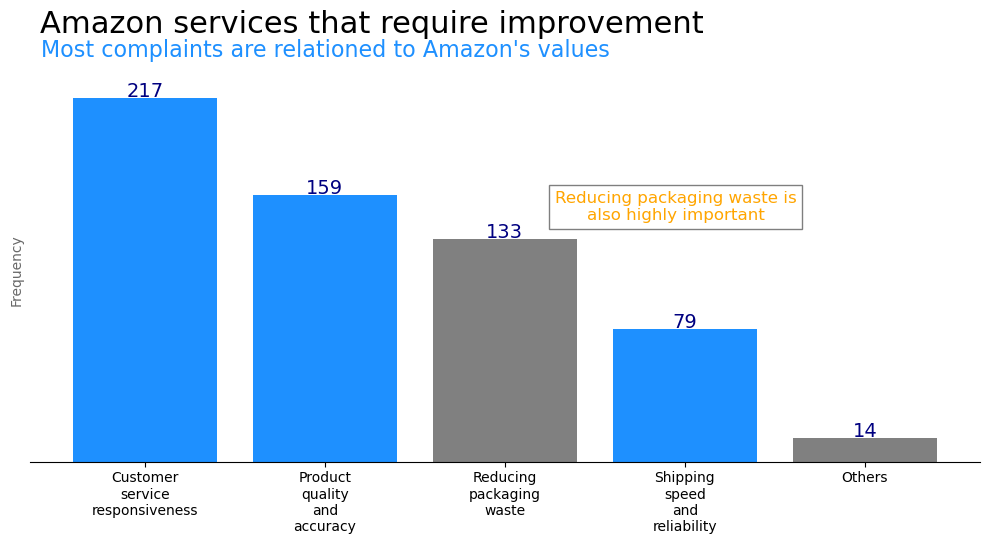

In [106]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_improvement['Improvement_Areas'], df_improvement['CountI'],
       color=['dodgerblue', 'dodgerblue', 'grey','dodgerblue', 'grey'] )

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns
for i, v in enumerate(df_improvement['CountI']):
    ax.text(i, v + 0.5, str(v), ha='center', color='navy', fontsize=14)

# Title
plt.title('Amazon services that require improvement',  fontweight='roman', 
          fontsize=22, x=0.36, y=1.1)

plt.suptitle("Most complaints are relationed to Amazon's values", x=0.33, y=0.85, 
             fontweight='light', color='dodgerblue', fontsize=16)

ax.set_ylabel('Frequency', color='dimgray')
ax.set_xlabel('')

# Ajustando as variáveis do eixo X
new_labels = [label.replace(' ', '\n') for label in df_improvement['Improvement_Areas']]
ax.set_xticks(range(len(new_labels)))  # Ajustar ticks
ax.set_xticklabels(new_labels, ha='center')

# Adicionar insights ao gráfico
insight_text = "Reducing packaging waste is\nalso highly important"
ax.text(2.95, max(df_improvement['CountI']) * 0.7, insight_text, 
        ha='center', va='center', fontsize=12, color='orange', 
        bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### What steps can we take if we reduce customer service responsiveness and product quality complaints by 20%? We can achieve this progressively—1% in the first month, 2% in the second month, and so on, reaching 19% after six months. By reducing packaging waste, we can also lower costs, allowing us to allocate more resources to address the areas that need the most improvement. Additionally, we can enhance our shipping speed, which is one of our key differentiator.

In [107]:
## preciso ver como diminuir as reclamações pode impactar a satisfação dos clientes
## correlation = 0.513962



# 6 months later

# case 1:   -19%

"""
['Customer service responsiveness'] = 178

['Product quality and accuracy'] = 129
"""

# case 2:   - waste    + shipping speed

"\n['Customer service responsiveness'] = 178\n\n['Product quality and accuracy'] = 129\n"

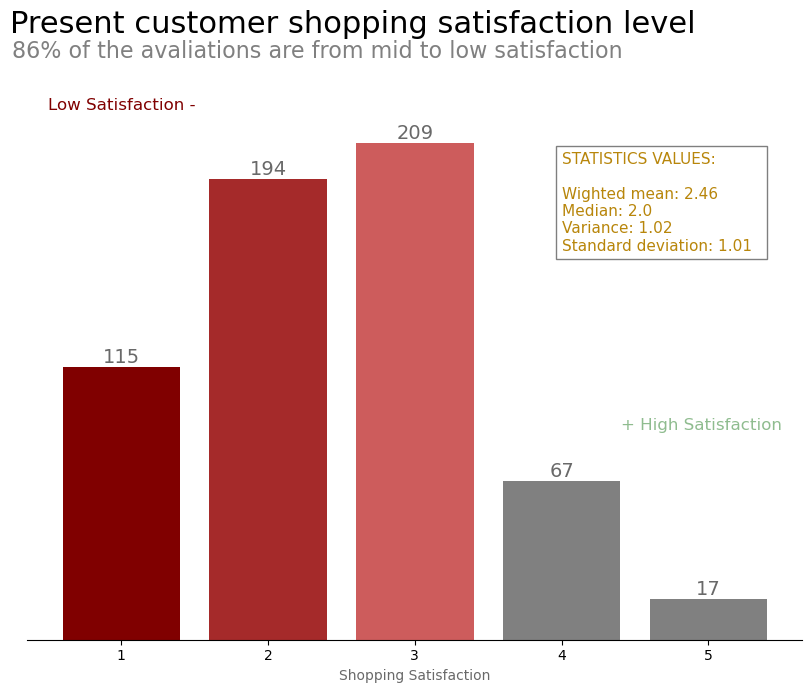

In [108]:
# plotar dois gráficos para comparar o resultado atual e o após 
# a implementação dos -19% de reclamação

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,8))


bars = ax.bar(df_satisfactions['Shopping_Satisfaction'], df_satisfactions['Count'], \
    color=['indianred', 'brown', 'maroon', 'grey', 'grey'])

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns with alligment
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
            ha='center', va='bottom', color='dimgray', fontsize=14)
    
# Title
plt.title('Present customer shopping satisfaction level',  fontweight='roman', 
          fontsize=22, x=0.42, y=1.1)

plt.suptitle("86% of the avaliations are from mid to low satisfaction", x=0.415, y=0.95, 
             fontweight='light', color='grey', fontsize=16)

ax.set_xlabel('Shopping Satisfaction', color='dimgrey')
ax.set_ylabel('')

# Legend
plt.text(+0.5, 225, 'Low Satisfaction -', ha='left', va='center', fontsize=12, color='maroon')
plt.text(len(df_satisfactions['Shopping_Satisfaction']) +0.5, 90, '+ High Satisfaction', 
         ha='right', va='center', fontsize=12, color='darkseagreen')

# Adjusting the graph limits
plt.ylim(0, max(df_satisfactions['Count']) + 20)
plt.subplots_adjust(bottom=0.2)  # Ajusta o gráfico para abrir mais espaço na parte inferior

# Adding insights 
insight_text = (f'STATISTICS VALUES:\
        \n\nWighted mean: {round(w_m, 2)} \
        \nMedian: {round(median, 2)} \nVariance: {round(variance, 2)} \
        \nStandard deviation: {round(st_dev, 2)}')
ax.text(4, max(df_satisfactions['Count']) * 0.88, insight_text, ha='left', \
    va='center', fontsize=11, color='darkgoldenrod', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

### Understanding how Satisfaction is related to services that require improvement

In [109]:
# ver a correlação entre shopping satisfaction e improvement areas
filtered_df = df[['age', 'Customer_Reviews_Importance', \
    'Rating_Accuracy ', 'Shopping_Satisfaction', 'Qtd_Personalized_Recommendation_Frequency']]

corr_df = filtered_df.corr()

corr_df

,age,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction,Qtd_Personalized_Recommendation_Frequency
age,1.000000,0.077193,-0.010202,0.003934,-0.018937
Customer_Reviews_Importance,0.077193,1.000000,0.314513,0.402317,0.313761
Rating_Accuracy,-0.010202,0.314513,1.000000,0.513962,0.437943
Shopping_Satisfaction,0.003934,0.402317,0.513962,1.000000,0.438395
Qtd_Personalized_Recommendation_Frequency,-0.018937,0.313761,0.437943,0.438395,1.000000


In [110]:
"""
0.8 ≤ |r| ≤ 1.0: correlação forte.
0.5 ≤ |r| < 0.8: correlação moderada.
0.3 ≤ |r| < 0.5: correlação fraca.
0.0 ≤ |r| < 0.3: correlação desprezível.
"""

'\n0.8 ≤ |r| ≤ 1.0: correlação forte.\n0.5 ≤ |r| < 0.8: correlação moderada.\n0.3 ≤ |r| < 0.5: correlação fraca.\n0.0 ≤ |r| < 0.3: correlação desprezível.\n'

<Axes: >

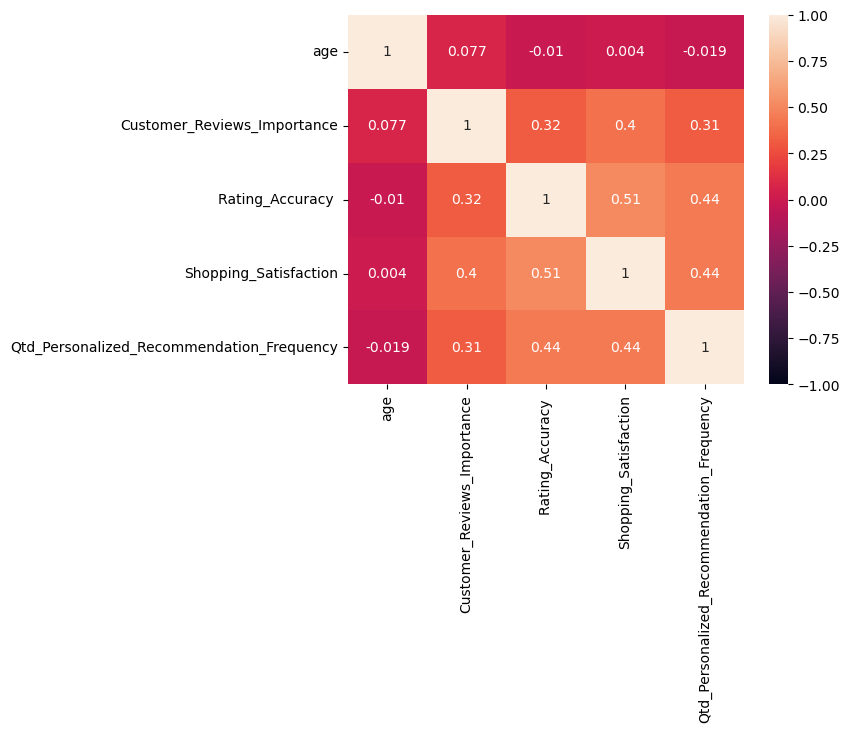

In [111]:
import seaborn as sns
sns.heatmap(filtered_df.corr().round(3), annot=True, vmin=-1,vmax=1)

In [112]:
df_analysis1 = df_improvement.join(df_satisfactions)
df_analysis1

,Improvement_Areas,CountI,Shopping_Satisfaction,Count
0,Customer service responsiveness,217,3,209
2,Product quality and accuracy,159,1,115
3,Reducing packaging waste,133,4,67
4,Shipping speed and reliability,79,5,17
1,Others,14,2,194


<Axes: >

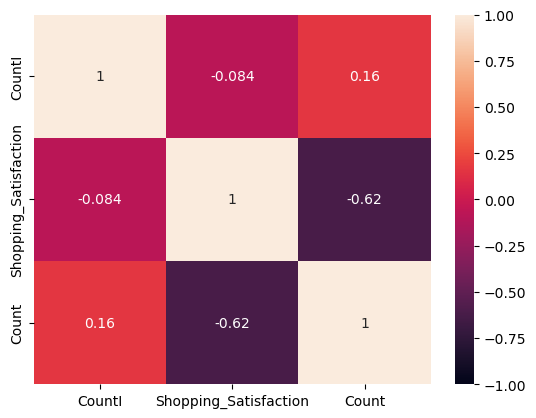

In [113]:
sns.heatmap(df_analysis1[['CountI', 'Shopping_Satisfaction', 'Count']].corr().round(3), annot=True, vmin=-1,vmax=1)

In [114]:
from sklearn.preprocessing import LabelEncoder

# Copiar o dataframe original
df_encoded = df.copy()

# Pré-processar colunas categóricas, garantindo que todos os valores sejam strings antes de codificar
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Se a coluna for categórica (tipo 'object')
        df_encoded[column] = df_encoded[column].astype(str)  # Converter para string
        df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])  # Codificar a coluna

# Calcular a correlação com a coluna 'Shopping_Satisfaction'
correlation_matrix = df_encoded.corr()
shopping_satisfaction_correlation = correlation_matrix['Shopping_Satisfaction'].sort_values(ascending=False)

# Exibir as correlações
print(shopping_satisfaction_correlation)


Shopping_Satisfaction                        1.000000
Rating_Accuracy                              0.513962
Qtd_Personalized_Recommendation_Frequency    0.438395
Customer_Reviews_Importance                  0.402317
Product_Search_Method                        0.205402
Review_Reliability                           0.204115
Timestamp                                    0.139836
Cart_Abandonment_Factors                     0.113294
Saveforlater_Frequency                       0.082143
Gender                                       0.068934
Cart_Completion_Frequency                    0.057224
Purchase_Frequency                           0.016256
Service_Appreciation                         0.012141
age                                          0.003934
Browsing_Frequency                          -0.001387
Improvement_Areas                           -0.027609
Personalized_Recommendation_Frequency       -0.028657
Review_Left                                 -0.038358
Purchase_Categories         

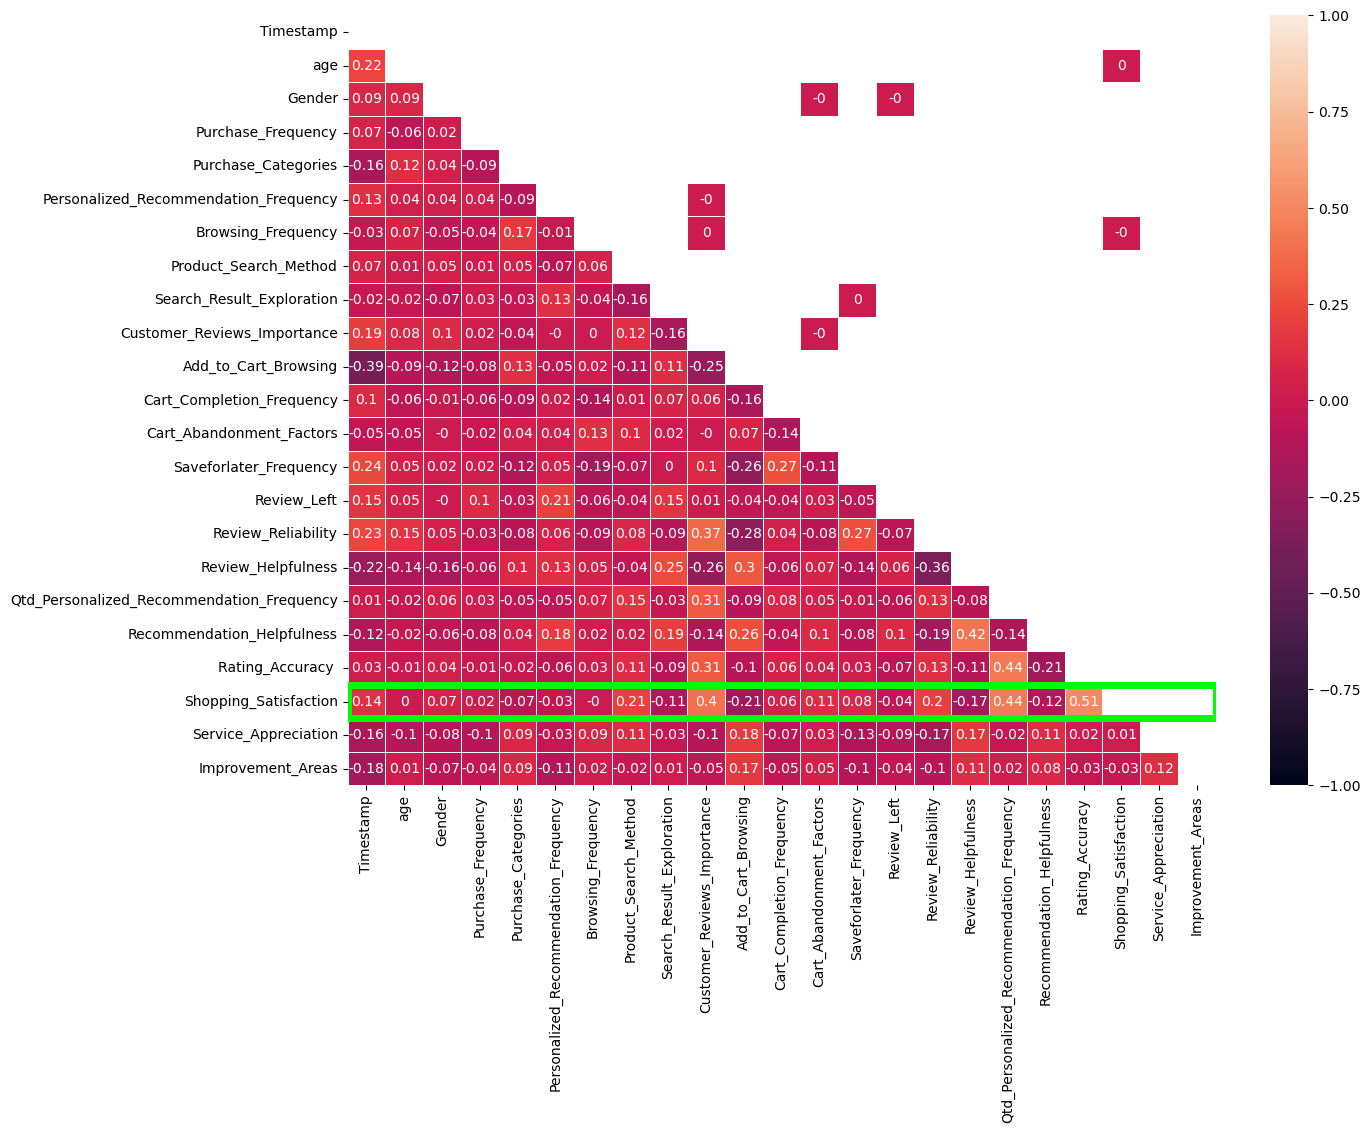

In [115]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_encoded.corr().round(2)
heatmap = sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, linewidths=0.6, mask=np.triu(correlation_matrix))

for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.index[i] == 'Shopping_Satisfaction':
        heatmap.add_patch(plt.Rectangle((0, i), len(correlation_matrix), 1, fill=False, edgecolor='lime', lw=5))
        
plt.show()

In [116]:
colunas = ['Rating_Accuracy ','Qtd_Personalized_Recommendation_Frequency', 'Customer_Reviews_Importance',\
    'Product_Search_Method','Review_Reliability','Add_to_Cart_Browsing']

#df['Product_Search_Method'].unique()
#df['Review_Reliability'].unique()
df['Add_to_Cart_Browsing'].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Definir variáveis independentes (X) e dependentes (y)
X = df_encoded[['Purchase_Frequency', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Purchase_Categories', \
                'Browsing_Frequency','Product_Search_Method','Search_Result_Exploration','Customer_Reviews_Importance', \
                'Add_to_Cart_Browsing','Cart_Completion_Frequency','Cart_Abandonment_Factors','Saveforlater_Frequency', \
                'Review_Left','Review_Reliability','Review_Helpfulness','Qtd_Personalized_Recommendation_Frequency', \
                'Recommendation_Helpfulness','Rating_Accuracy ','Shopping_Satisfaction','Service_Appreciation','Improvement_Areas']]

y = df_encoded['Shopping_Satisfaction']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Correlações moderadas:
Shopping_Satisfaction & Rating_Accuracy

### Correlações fracas:
Customer_Reviews_Importance & Rating_Accuracy
Shopping_Satisfaction & Qtd_Personalized_Recommendation_Frequency
Customer_Reviews_Importance & Shopping_Satisfaction
Customer_Reviews_Importance & Rating_Accuracy 
Customer_Reviews_Importance & Customer_Reviews_Importance


Text(0, 0.5, 'Rating_Accuracy')

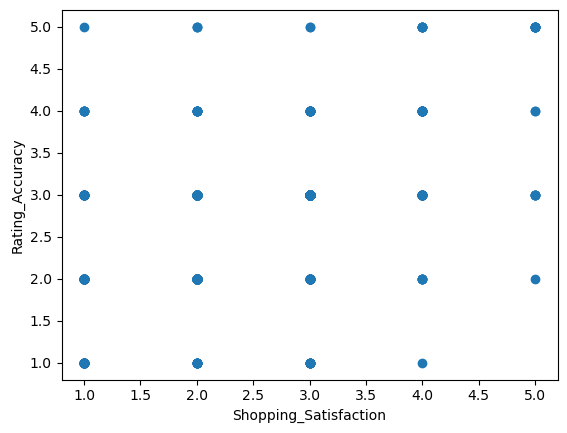

In [46]:
plt.scatter(filtered_df['Shopping_Satisfaction'], filtered_df['Rating_Accuracy '])
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Rating_Accuracy')